In [1]:
from pathlib import Path
from scipy import stats
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn import image
from nilearn import masking
import nibabel as nib
import numpy as np

In [2]:
%ll /s/babbage/b/nobackup/nblancha/public-datasets

total 116
drwxrws--- 17 chairoy   4096 Feb 11 07:34 APE-V/
drwxrws---  3 mdboyle   4096 Aug 17  2021 APE-V_slowfast/
drwx--S---  3 huma97    4096 Mar 11 11:32 ART/
drwx--S---  6 eringunn  4096 Feb 16 20:43 bayesian_eval_ground_truth-free/
drwx--S---  4 charldol 20480 Oct 22 12:41 birdFiles/
drwx--S---  6 wpickard  4096 Feb 16 14:39 bold5000/
drwx--S---  2 wpickard 20480 Feb 13 19:05 bold5000r2/
drwxrws---  4 anju      4096 May 18  2021 epic/
drwxrws---  4 anju      4096 May 18  2021 epic_kitchen/
drwxrws---  5 anju      4096 May 10  2021 epic_torrent_venv/
drwxrws--- 11 cjung     4096 Feb 27 19:56 FacePerception/
drwxrwsr-x  7 muelann   4096 Aug  6  2021 Fowl/
drwxrws---  5 chairoy   4096 Jul 10  2021 human3.6m/
drwxrws---  5 ilianaca  4096 Feb 12 15:17 iSAT-Video/
drwxrws---  4 ilianaca  4096 Feb 22 00:29 iSAT-Video-Dataset/
drwx--S--- 18 zachf     4096 Oct  6  2019 LINEMOD/
drwx--S---  6 cjung     4096 Oct 26 23:53 Mo2Cap2/
drwxrws---  3 evelynn   4096 Oct 19 17:35 Native_Bee_Watch/


In [3]:
dataset_path = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2')

In [4]:
img = nib.load(dataset_path / 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-01.nii.gz')

In [5]:
data = img.get_fdata()

In [6]:
np.nanmean(data)

0.02327135033697803

In [7]:
np.nanstd(data)

95.27316109514004

In [8]:
np.nanmean(np.abs(data))

2.2072517085567753

In [9]:
img_spm = nib.load(dataset_path / 'CSI1_SPMResids_allsess_TR34.nii.gz')

In [10]:
data_spm = img_spm.get_fdata()

In [11]:
np.nanvar(data_spm)

0.0013145996692423292

In [12]:
np.nanmin(data_spm), np.nanmax(data_spm), np.nanmean(data_spm), np.nanstd(data_spm), np.nanvar(data_spm)

(-22.7958984375,
 89.81938934326172,
 2.9570667464198515e-05,
 0.036257408473887504,
 0.0013145996692423292)

In [13]:
np.nanstd(data_spm)

0.036257408473887504

In [14]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  71  89  72 370   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 244624
glmin           : -374421
descrip         : b''
aux_file        : b'none'
qform_code      : unknown
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [2. 0. 0. 2.]
srow_y 

In [15]:
data.shape

(71, 89, 72, 370)

In [16]:
np.nanmin(data), np.nanmax(data), np.nanmean(data), np.nanstd(data), np.nanvar(data)

(-374420.84375,
 244623.5625,
 0.02327135033697803,
 95.27316109514004,
 9076.975225060507)

In [17]:
z = stats.zscore(data, axis=3)

In [18]:
np.nanmax(z), np.nanmin(z), np.nanmean(z)

(13.44452177550758, -19.209372728976604, -8.745708741727855e-14)

In [19]:
z.shape

(71, 89, 72, 370)

In [20]:
np.nanmin(z), np.nanmax(z), np.nanmean(z), np.nanstd(z), np.nanvar(z)

(-19.209372728976604,
 13.44452177550758,
 -8.745708741727855e-14,
 1.0000000000000027,
 1.0000000000000053)

(array([7.00000e+00, 3.70000e+01, 1.21800e+03, 3.40760e+04, 1.19182e+05,
        3.80770e+04, 1.50900e+03, 4.10000e+01, 1.00000e+01, 4.00000e+00]),
 array([-7.14718714, -5.56850076, -3.98981437, -2.41112798, -0.8324416 ,
         0.74624479,  2.32493118,  3.90361757,  5.48230395,  7.06099034,
         8.63967673]),
 <BarContainer object of 10 artists>)

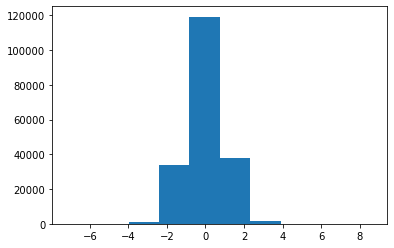

In [27]:
plt.hist(z[:,:,:,0].flatten())

(array([  235.,  3188., 23470., 70959., 69771., 23070.,  3118.]),
 array([-4, -3, -2, -1,  0,  1,  2,  3]),
 <BarContainer object of 7 artists>)

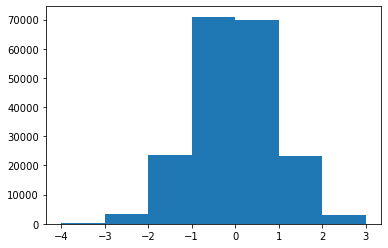

In [49]:
plt.hist(z[:,:,:,0].flatten(),bins=range(-4,4))

In [24]:
z[:,:,:,100].flatten()

array([nan, nan, nan, ..., nan, nan, nan])

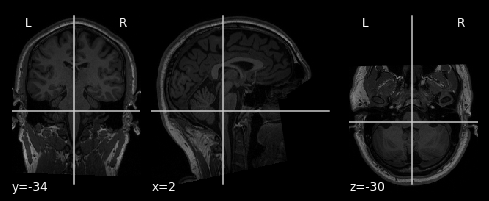

In [4]:
cs1_anat = image.load_img('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000/BOLD5000_Structural/CSI1_Structural/T1w_MPRAGE_CSI1.nii')
plotting.plot_anat(cs1_anat)

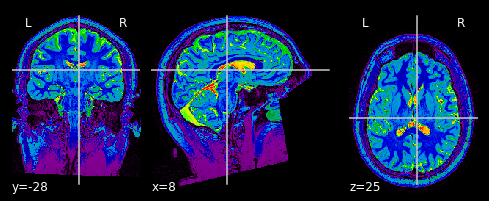

In [125]:
cs1_t2 = image.load_img('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000/BOLD5000_Structural/CSI1_Structural/T2w_SPACE_CSI1.nii')
plotting.plot_epi(cs1_t2)

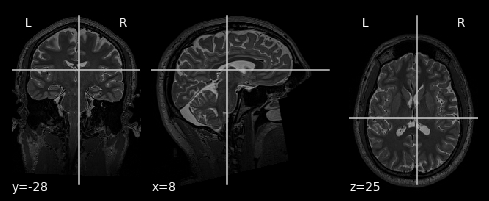

In [85]:
plotting.plot_anat('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000/BOLD5000_Structural/CSI1_Structural/T2w_SPACE_CSI1.nii')

In [5]:
cs1_brainmask = image.load_img('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/CSI1_brainmask.nii.gz')

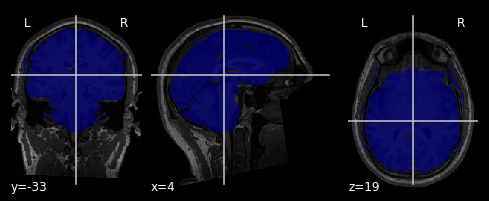

In [6]:
plotting.plot_roi(cs1_brainmask, cs1_anat)

In [40]:
masked_data = masking.apply_mask(img, cs1_brainmask)

ValueError: Mask affine: 
[[   2.            0.            0.          -67.26271057]
 [   0.            2.            0.         -113.77284241]
 [   0.            0.            2.          -60.58848572]
 [   0.            0.            0.            1.        ]]
 is different from img affine:
[[2. 0. 0. 2.]
 [0. 2. 0. 2.]
 [0. 0. 2. 2.]
 [0. 0. 0. 1.]]

In [44]:
plotting.plot_img(image.index_img(0))

TypeError: index_img() missing 1 required positional argument: 'index'

(array([4.7073000e+04, 1.9528000e+04, 4.6026000e+04, 1.9443000e+05,
        3.6169168e+07, 3.6112649e+07, 1.9720300e+05, 4.7192000e+04,
        2.0054000e+04, 4.9257000e+04]),
 array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.]),
 <BarContainer object of 10 artists>)

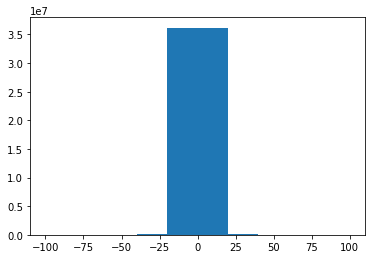

In [52]:
plt.hist(data.flatten().clip(-100,100))

In [57]:
z_clipped = stats.zscore(data.clip(-50,50), axis=3)

(array([ 3214., 23555., 70775., 69743., 23138.,  3152.]),
 array([-3, -2, -1,  0,  1,  2,  3]),
 <BarContainer object of 6 artists>)

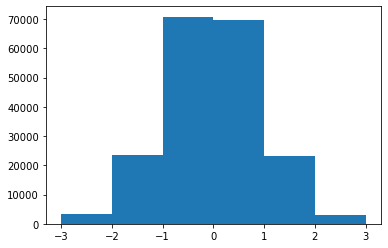

In [64]:
plt.hist(z_clipped[:,:,:,0].flatten(), bins=range(-3,4))

(array([ 3188., 23470., 70959., 69771., 23070.,  3118.]),
 array([-3, -2, -1,  0,  1,  2,  3]),
 <BarContainer object of 6 artists>)

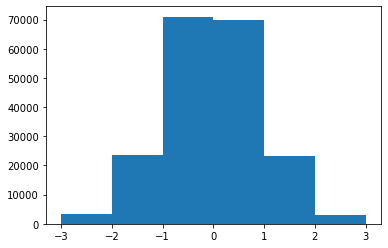

In [65]:
plt.hist(z[:,:,:,0].flatten(), bins=range(-3,4))

In [78]:
img_z_clipped = image.new_img_like(img, z.clip(-4,4))

In [79]:
img_mean = image.mean_img()

TypeError: mean_img() missing 1 required positional argument: 'imgs'

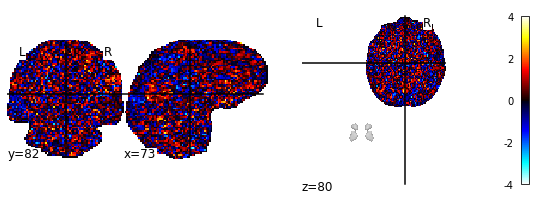

In [80]:
plotting.plot_stat_map(image.index_img(img_z_clipped,100))

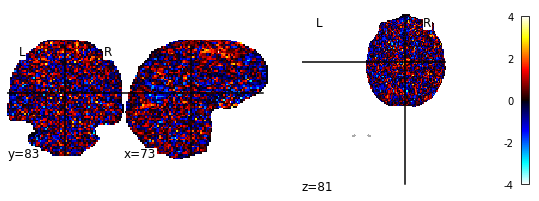

In [81]:
plotting.plot_stat_map(image.index_img(img_z_clipped,101))

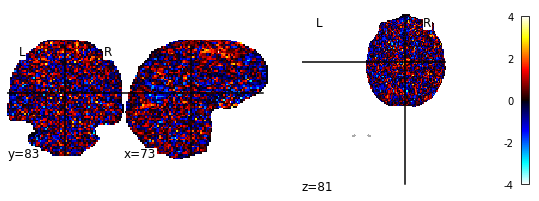

In [82]:
plotting.plot_stat_map(image.index_img(img_z_clipped,101))

/s/babbage/b/nobackup/nblancha/merry/conda/envs/fmri-gen/lib/python3.8/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


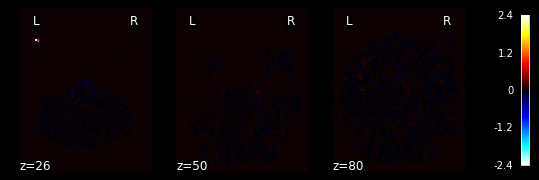

In [97]:
plotting.plot_stat_map(image.index_img(image.new_img_like(img, data_spm),100), bg_img=None, threshold=None, black_bg=True, display_mode='z', cut_coords=3)

/s/babbage/b/nobackup/nblancha/merry/conda/envs/fmri-gen/lib/python3.8/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


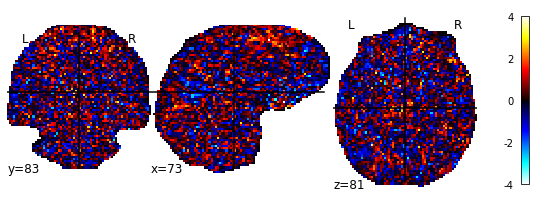

In [84]:
plotting.plot_stat_map(image.index_img(img_z_clipped,101), bg_img=None)

In [105]:
img_z = image.new_img_like(img, z)

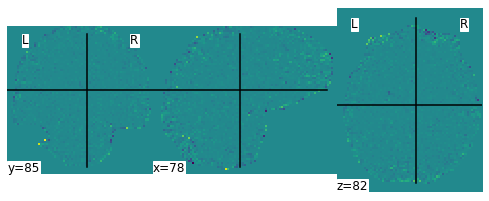

In [128]:
plotting.plot_img(img_mean)

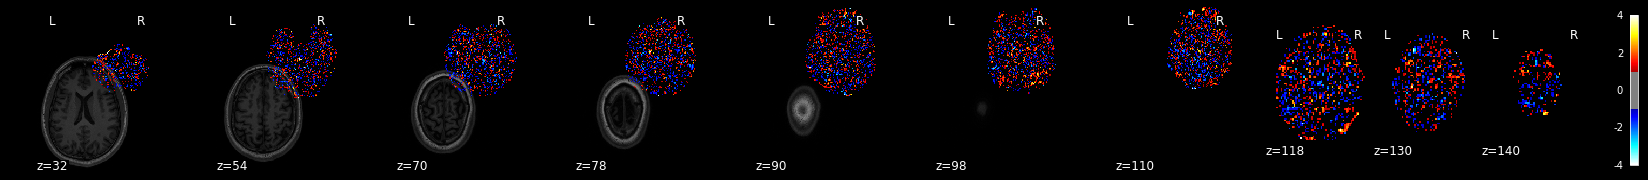

In [130]:
plotting.plot_stat_map(image.index_img(img_z_clipped,10), bg_img=cs1_anat, display_mode='z', threshold=1, cut_coords=10, black_bg=True)

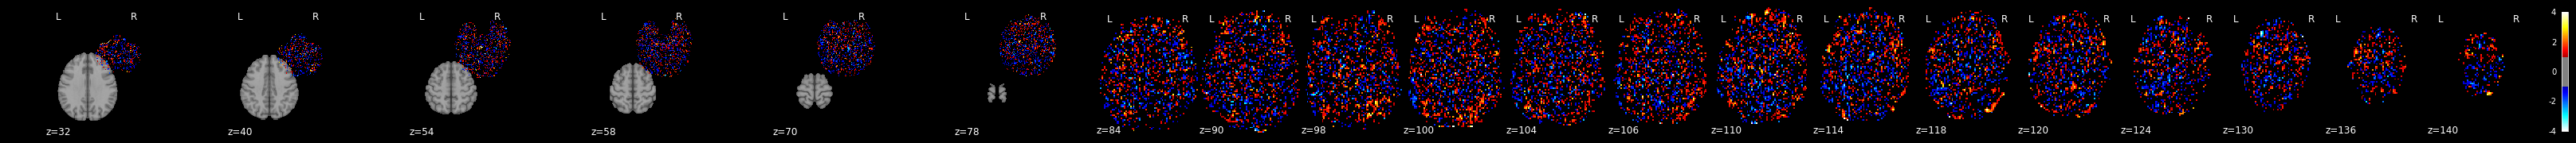

In [133]:
plotting.plot_stat_map(image.index_img(img_z_clipped,10), display_mode='z', threshold=1, cut_coords=20, black_bg=True)


In [122]:
print(img_z_clipped.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4  71  89  72 370   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 2.0
qoffset_y       : 2.0
qoffset_z       : 2.0
srow_x          : [2. 0. 0. 2.]
srow_y          : [0. 2

In [123]:
print(cs1_anat.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 176 256 256   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  1.  1.  1.  2.3 0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=2;Time=121832.015;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -83.26271
qoffset_y       : -131.77284
qoffset_z       : -142.5884

In [126]:
print(cs1_t2.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 176 256 256   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 3. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=4.2e+02;Time=122408.280;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -83.26271
qoffset_y       : -131.77284
qoffset_z       : -142.58849


In [124]:
print(cs1_brainmask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 71 89 72  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 2. 2. 2. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 1
glmin           : 0
descrip         : b'spm_spm:resultant analysis mask'
aux_file        : b''
qform_code      : unknown
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -67.26271
qoffset_y       : -113.77284
qoffset_z       : -60.588486
srow_x    

In [127]:
print(img_spm.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   4   71   89   72 5254    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 90
glmin           : -23
descrip         : b''
aux_file        : b'none'
qform_code      : unknown
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [2. 0. 0. 2.]
srow_y 

In [ ]:
test = nib.load('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives_fmriprep_sub-CSI1_ses-01_func_sub-CSI1_ses-01_task-5000scenes_run-01_bold_space-T1w_preproc.nii.gz')